<h2 style='color:blue' align='center'>chest_xray Images Classification Using Convolutional Neural Network (CNN)</h2>

<img src="small_images.jpg" />

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import os

SEED = 15243
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
tf.random.set_seed(SEED)

plt.rc("axes.spines", right=False, top=False)
plt.rc("font", family="serif")

In [2]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


<h4 style="color:purple">Load the dataset</h4>

In [2]:
import splitfolders
import os
# path = r"D:\downloadss\archive(7)\chest_xray"
# print(os.listdir(path))

In [14]:
splitfolders.ratio(path,seed=1337, output="chest-Splittedddd", ratio=(0.9, 0.05, 0.05))

Copying files: 0 files [00:00, ? files/s]


In [5]:
BATCH_SIZE = 25
DATA_DIRT = (r"C:\Users\Lenovo\prain-Splitted\train")
DATA_DIRTE = (r"C:\Users\Lenovo\prain-Splitted\test")
DATA_DIRV = (r"C:\Users\Lenovo\prain-Splitted\val")
IMG_SIZE = 256
MAX_EPOCHS = 25
class_names = ['1', '2', '3']
class_details = ['1', '2', '3']

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIRT,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    class_names=class_names,
    seed=45,
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIRV,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    class_names=class_names,
    seed=45,
    
    
)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIRTE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    class_names=class_names,
    seed=45,

    
)


def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label


def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds=validation_ds.map(process)
testing_ds=testing_ds.map(process)


Found 2757 files belonging to 3 classes.
Found 152 files belonging to 3 classes.
Found 155 files belonging to 3 classes.


In [6]:
# Cache and prefetch data for faster training
AUTOTUNE = tf.data.AUTOTUNE



def compile_and_fit_model(model: tf.keras.Sequential) -> tf.keras.callbacks.History:
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=1e-4,
        patience=5,
        mode="auto",
        restore_best_weights=True
    )
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.2,
        patience=5,
        min_lr=0.001
    )
    history = model.fit(
        train_ds,
        validation_data=validation_ds,
        epochs=30,
        callbacks=[early_stopping, reduce_lr]
    )
    performance_df = pd.DataFrame(history.history)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    for ax, metric in zip(axes.flat, ["accuracy", "loss"]):
        performance_df.filter(like=metric).plot(ax=ax)
        ax.set_title(metric.title(), size=15, pad=20)
    return history

def plot_predictions(model: tf.keras.Sequential) -> None:
    plt.figure(figsize=(14, 14))
    for images, labels in train_ds.take(1):
        labels = labels.numpy()
        predicted_labels = np.argmax(model.predict(images), axis=1)
        for i, (actual, pred) in enumerate(zip(predicted_labels, labels)):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            if actual == pred:
                plt.title(class_details[labels[i]], color="green", size=9)
            else:
                plt.title(f"{class_details[predicted_labels[i]]}\n"
                          + f"(Actual: {class_details[labels[i]]})",
                          color="red", size=9)
            plt.axis("off")

## DenseNet201

In [8]:
pretrained_DenseNet201_base=tf.keras.applications.densenet.DenseNet201(
    include_top=False,
    weights='imagenet',
    pooling="avg"
)
pretrained_DenseNet201_base.trainable = False


DenseNet201_modell = tf.keras.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Lambda(tf.keras.applications.densenet.preprocess_input),
    pretrained_DenseNet201_base,
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(3, activation="softmax")
])
DenseNet201_modell.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 dense (Dense)               (None, 512)               983552    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 19,569,731
Trainable params: 1,247,747
Non-trainable params: 18,321,984
_________________________________________________________________


Epoch 1/30
111/111 [==============================] - 861s 7s/step - loss: 1.0401 - accuracy: 0.5034 - val_loss: 0.8639 - val_accuracy: 0.5921 - lr: 0.0010
Epoch 2/30
111/111 [==============================] - 783s 7s/step - loss: 0.8316 - accuracy: 0.6130 - val_loss: 0.7560 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 3/30
111/111 [==============================] - 793s 7s/step - loss: 0.7102 - accuracy: 0.6819 - val_loss: 0.6342 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 4/30
111/111 [==============================] - 777s 7s/step - loss: 0.6608 - accuracy: 0.6975 - val_loss: 0.6272 - val_accuracy: 0.7237 - lr: 0.0010
Epoch 5/30
111/111 [==============================] - 789s 7s/step - loss: 0.6252 - accuracy: 0.7138 - val_loss: 0.6924 - val_accuracy: 0.6711 - lr: 0.0010
Epoch 6/30
111/111 [==============================] - 793s 7s/step - loss: 0.6370 - accuracy: 0.7145 - val_loss: 0.5618 - val_accuracy: 0.7434 - lr: 0.0010
Epoch 7/30
111/111 [==============================] - 801s 7s/st

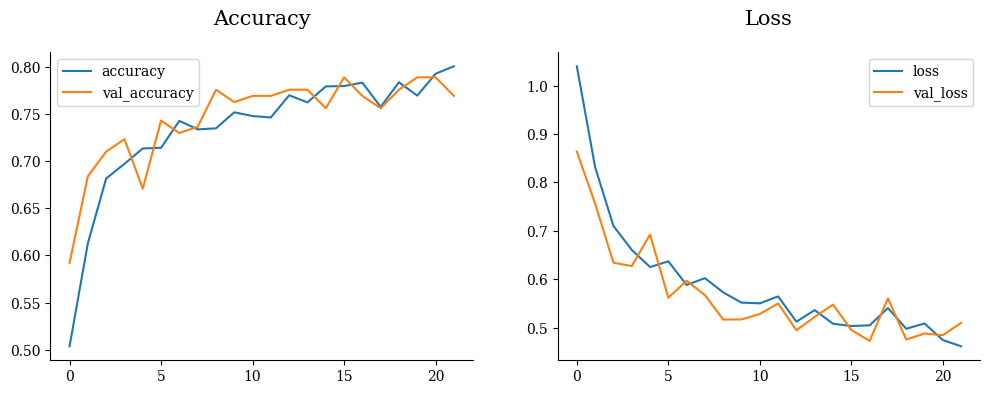

In [9]:
DenseNet201_history = compile_and_fit_model(DenseNet201_modell)

In [12]:
from tensorflow.keras.models import save_model, load_model
# save_model(model,'124446.model')

In [13]:
DenseNet201_modell.save('DenseNet201_modellchest.h5')

In [19]:
# saving and loading the .h5 model

# save model
DenseNet201_modell.save('DenseNet201_modellchest2.h5')
print('Model Saved!')

# load model
savedModel=load_model('DenseNet201_modellchest2.h5')
savedModel.summary()


Model Saved!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 dense (Dense)               (None, 512)               983552    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 19,569,731
Trainable params: 1,247,747
Non-trainable params: 18,321,984
_________________________________________________________________


In [18]:

model=load_model("model.h5")



C:\Users\Lenovo\anaconda3\lib\site-packages\keras\layers\core\lambda_layer.py:303: UserWarning: keras.src.applications.densenet is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2948\626821963.py", line 1, in <module>
    model=load_model("model.h5")
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:/Users/Lenovo/anaconda3/lib/site-packages/keras/src/applications/densenet.py", line 422, in preprocess_input
NameError: Exception encountered when calling layer "lambda" (type Lambda).

name 'imagenet_utils' is not defined

Call arguments received:
  • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=float32)
  • mask=None
  • training=False

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\IP

In [21]:
!pip freeze requirenents.txt

absl-py==1.4.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.11.2
anaconda-navigator==2.4.2
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481856696/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569876605/work
arrow @ file:///C:/b/abs_cal7u12ktb/croot/arrow_1676588147908/work
astroid @ file:///C:/b/abs_d4lg3_taxn/croot/astroid_1676904351456/work
astropy @ file:///C:/ci/astropy_1657719642921/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
astunparse==1.6.3
atomicwrites==1.4.0
attrs @ file:///C:/b/abs_09s3y775ra/croot/attrs_1668696195628/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///C:/b/abs_a2shv_3tqi/croot/babel_

In [17]:
!pip install tensorflowjs
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(DenseNet201_modell ,r"D:\cources\computer vision projects\object detection projects\cv broject chest 2")

ERROR: Cannot install tensorflow-intel==2.12.0 and tensorflowjs==3.21.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


INFO: pip is looking at multiple versions of tensorflow-intel to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    tensorflowjs 3.21.0 depends on protobuf<3.20 and >=3.9.2
    tensorflow-intel 2.12.0 depends on protobuf!=4.21.0, !=4.21.1, !=4.21.2, !=4.21.3, !=4.21.4, !=4.21.5, <5.0.0dev and >=3.20.3

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict



In [ ]:
# score =DenseNet201_modell.evaluate(testing_ds, steps = len(testing_ds)/BATCH_SIZE, verbose = 0)
# print('test loss:', score[0])
# print('test accuracy:', score[1])

## efficientnet_v2

In [10]:
pretrained_efficientnet_v2_base=tf.keras.applications.efficientnet_v2.EfficientNetV2S(
    include_top=False,
    weights='imagenet',
    pooling="avg"
)
pretrained_efficientnet_v2_base.trainable = False


efficientnet_v2_modell = tf.keras.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Lambda(tf.keras.applications.efficientnet_v2.preprocess_input),
    pretrained_efficientnet_v2_base,
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(3, activation="softmax")
])
efficientnet_v2_modell.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 efficientnetv2-s (Functiona  (None, 1280)             20331360  
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 512)               655872    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 21,251,427
Trainable params: 920,067
Non-trainable params: 20,331,360
____________________________________

Epoch 1/30
111/111 [==============================] - 750s 6s/step - loss: 0.7495 - accuracy: 0.6674 - val_loss: 0.8316 - val_accuracy: 0.5987 - lr: 0.0010
Epoch 2/30
111/111 [==============================] - 554s 5s/step - loss: 0.7276 - accuracy: 0.6797 - val_loss: 0.8127 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 3/30
111/111 [==============================] - 565s 5s/step - loss: 0.7216 - accuracy: 0.6881 - val_loss: 0.8111 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/30
111/111 [==============================] - 551s 5s/step - loss: 0.7258 - accuracy: 0.6797 - val_loss: 0.7914 - val_accuracy: 0.6118 - lr: 0.0010
Epoch 5/30
111/111 [==============================] - 544s 5s/step - loss: 0.7190 - accuracy: 0.6892 - val_loss: 0.8293 - val_accuracy: 0.6184 - lr: 0.0010
Epoch 6/30
111/111 [==============================] - 556s 5s/step - loss: 0.7090 - accuracy: 0.6841 - val_loss: 0.8353 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 7/30
111/111 [==============================] - 547s 5s/st

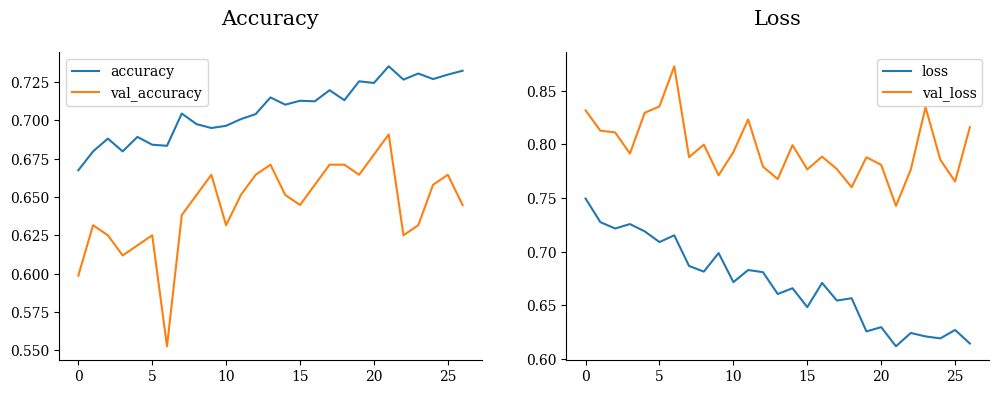

In [20]:
efficientnet_v2_history = compile_and_fit_model(efficientnet_v2_modell)

In [ ]:
# score =efficientnet_v2_modell.evaluate(testing_ds, steps = len(testing_ds)/BATCH_SIZE, verbose = 0)
# print('test loss:', score[0])
# print('test accuracy:', score[1])